# Dependencies

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Utilities (Functions)

## Mapping Function

In [77]:
def apply_all_mappings_with_nan_replacement(df, mappings_df):
    # Identify columns with mappings
    columns_with_mappings = mappings_df[mappings_df['code/format'].notnull()]['field name'].unique()
    
    for column_name in columns_with_mappings:
        if column_name in df.columns:
            # Replace -1 with NaN in the df column
            df[column_name] = df[column_name].replace(-1, np.nan)
            
            # Filter mappings for the specific column
            column_mappings = mappings_df[mappings_df['field name'] == column_name]
            
            # Ensure that 'code/format' is numeric for matching with df column values
            if column_mappings['code/format'].dtype == 'O':
                column_mappings['code/format'] = pd.to_numeric(column_mappings['code/format'], errors='coerce')
            
            # Create a mapping dictionary {code/format: label}, dropping any NaN keys
            mapping_dict = pd.Series(column_mappings['label'].values, index=column_mappings['code/format']).dropna().to_dict()
            
            # Replace values in the column based on the mapping dictionary
            df[column_name] = df[column_name].map(mapping_dict).fillna(df[column_name])

    return df

## Information Function

In [83]:
def show_information(df, column_name : str):
    unique_value_number = df[f'{column_name}'].nunique()
    # unique_values = df[f'{column_name}'].unique()
    unique_value_counts = df[f'{column_name}'].value_counts()

    filtered_for_plot = df.groupby(f'{column_name}')[f'{column_name}'].size()

    print(f'''{column_name} has {unique_value_number} Unique Values \n
{unique_value_counts}
    ''')

    



In [84]:
show_information(df, 'casualty_type')

casualty_type has 21 Unique Values 

casualty_type
Car occupant                                                 32715
Pedestrian                                                    8940
Cyclist                                                       7155
Motorcycle 125cc and under rider or passenger                 3629
Motorcycle over 500cc rider or passenger                      1791
Van / Goods vehicle (3.5 tonnes mgw or under) occupant        1448
Bus or coach occupant (17 or more pass seats)                  972
Motorcycle - unknown cc rider or passenger                     861
Other vehicle occupant                                         829
Motorcycle over 125cc and up to 500cc rider or  passenger      822
Taxi/Private hire car occupant                                 699
Goods vehicle (unknown weight) occupant                        420
Motorcycle 50cc and under rider or passenger                   410
Goods vehicle (7.5 tonnes mgw and over) occupant               178
Electric mo

<BarContainer object of 21 artists>

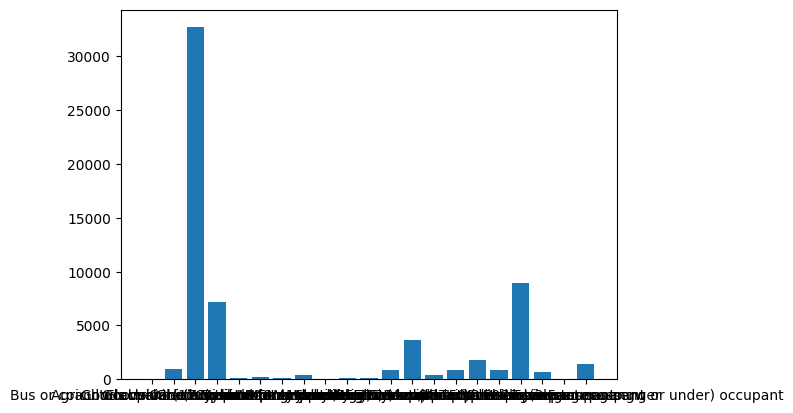

In [88]:
column_name = 'casualty_type'
plt.bar(df.groupby(f'{column_name}')[f'{column_name}'].size().index, df.groupby(f'{column_name}')[f'{column_name}'].size())

## Preprocessing Function

# Data

**Status**: The status of the accident (e.g., reported, under investigation).

**Accident_Index**: A unique identifier for each reported accident.

**Accident_Year**: The year in which the accident occurred.

**Accident_Reference**: A reference number associated with the accident.

**Vehicle_Reference**: A reference number for the involved vehicle in the accident.

**Casualty_Reference**: A reference number for the casualty involved in the accident.

**Casualty_Class**: Indicates the class of the casualty (e.g., driver, passenger, pedestrian).

**Sex_of_Casualty**: The gender of the casualty (male or female).

**Age_of_Casualty**: The age of the casualty.

**Age_Band_of_Casualty**: Age group to which the casualty belongs (e.g., 0-5, 6-10, 11-15).

**Casualty_Severity**: The severity of the casualty's injuries (e.g., fatal, serious, slight).

**Pedestrian_Location**: The location of the pedestrian at the time of the accident.

**Pedestrian_Movement**: The movement of the pedestrian during the accident.

**Car_Passenger**: Indicates whether the casualty was a car passenger at the time of the accident (yes or no).

**Bus_or_Coach_Passenger**: Indicates whether the casualty was a bus or coach passenger (yes or no).

**Pedestrian_Road_Maintenance_Worker**: Indicates whether the casualty was a road maintenance worker (yes or no).

**Casualty_Type**: The type of casualty (e.g., driver/rider, passenger, pedestrian).

**Casualty_Home_Area_Type**: The type of area in which the casualty resides (e.g., urban, rural).

**Casualty_IMD_Decile**: The IMD decile of the area where the casualty resides (a measure of deprivation).

**LSOA_of_Casualty**: The Lower Layer Super Output Area (LSOA) associated with the casualty's location.

*This dataset provides valuable insights for analyzing road accidents, identifying trends, and implementing safety measures to reduce casualties and enhance road safety. Researchers, policymakers, and analysts can leverage this dataset for evidence-based decision-making and improving overall road transportation systems.*

In [40]:
df = pd.read_csv('dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2022 (1).csv')
df_clean = df.copy()
df

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,Unvalidated,2022070151244,2022,070151244,2,1,1,2,46,8,3,0,0,0,0,0,9,1,9,E01033378
1,Unvalidated,2022070152668,2022,070152668,1,1,1,1,30,6,3,0,0,0,0,0,9,1,2,E01018551
2,Unvalidated,2022070154696,2022,070154696,1,1,1,2,58,9,3,0,0,0,0,0,9,1,10,E01006134
3,Unvalidated,2022070154696,2022,070154696,2,3,1,2,78,11,3,0,0,0,0,0,9,2,10,E01018724
4,Unvalidated,2022070154696,2022,070154696,3,2,1,1,63,9,3,0,0,0,0,0,9,3,7,W01000578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61347,Unvalidated,2022461156711,2022,461156711,1,1,3,2,56,9,3,10,9,0,0,0,0,1,10,E01024046
61348,Unvalidated,2022461157243,2022,461157243,1,1,3,1,14,3,2,5,9,0,0,0,0,-1,-1,-1
61349,Unvalidated,2022461157256,2022,461157256,2,1,1,1,42,7,3,0,0,0,0,0,9,1,5,E01016034
61350,Unvalidated,2022461157316,2022,461157316,1,1,1,2,40,7,3,0,0,0,0,0,9,1,3,E01024497


In [41]:
mappings_df  = pd.read_excel('dft_road_casualty_statistics_road_safety_open_dataset_data_guide.xlsx', sheet_name='Sheet1')


In [42]:
mappings_df

,table,field name,code/format,label,note
0,Accident,collision_index,NaN,NaN,unique value for each accident. The accident_i...
1,Accident,collision_year,NaN,NaN,NaN
2,Accident,collision_reference,NaN,NaN,In year id used by the police to reference a c...
3,Accident,accident_index,NaN,NaN,unique value for each accident. The accident_i...
4,Accident,accident_year,NaN,NaN,NaN
...,...,...,...,...,...
1762,casualty_adjustment,injury_based_severity_code,5,Slight,NaN
1763,casualty_adjustment,injury_based_severity_code,6,Very Serious,NaN
1764,casualty_adjustment,injury_based_severity_code,7,Moderately Serious,NaN
1765,casualty_adjustment,injury_based_severity_code,3,Less Serious,NaN


In [45]:


# Apply mappings to all eligible columns with -1 values replaced by NaN
apply_all_mappings_with_nan_replacement(df, mappings_df)

# Displaying some rows to verify the changes
df

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,Unvalidated,2022070151244,2022,070151244,2,1,Driver or rider,Female,46.0,46 - 55,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Less deprived 10-20%,E01033378
1,Unvalidated,2022070152668,2022,070152668,1,1,Driver or rider,Male,30.0,26 - 35,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,More deprived 10-20%,E01018551
2,Unvalidated,2022070154696,2022,070154696,1,1,Driver or rider,Female,58.0,56 - 65,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Least deprived 10%,E01006134
3,Unvalidated,2022070154696,2022,070154696,2,3,Driver or rider,Female,78.0,Over 75,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Small town,Least deprived 10%,E01018724
4,Unvalidated,2022070154696,2022,070154696,3,2,Driver or rider,Male,63.0,56 - 65,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Rural,Less deprived 30-40%,W01000578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61347,Unvalidated,2022461156711,2022,461156711,1,1,Pedestrian,Female,56.0,56 - 65,Slight,Unknown or other,Unknown or other,Not car passenger,Not a bus or coach passenger,No / Not applicable,Pedestrian,Urban area,Least deprived 10%,E01024046
61348,Unvalidated,2022461157243,2022,461157243,1,1,Pedestrian,Male,14.0,11 - 15,Serious,"In carriageway, crossing elsewhere",Unknown or other,Not car passenger,Not a bus or coach passenger,No / Not applicable,Pedestrian,NaN,NaN,-1
61349,Unvalidated,2022461157256,2022,461157256,2,1,Driver or rider,Male,42.0,36 - 45,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,More deprived 40-50%,E01016034
61350,Unvalidated,2022461157316,2022,461157316,1,1,Driver or rider,Female,40.0,36 - 45,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,More deprived 20-30%,E01024497


In [46]:
df[df['accident_reference'] == '070154696']

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
2,Unvalidated,2022070154696,2022,070154696,1,1,Driver or rider,Female,58.0,56 - 65,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Least deprived 10%,E01006134
3,Unvalidated,2022070154696,2022,070154696,2,3,Driver or rider,Female,78.0,Over 75,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Small town,Least deprived 10%,E01018724
4,Unvalidated,2022070154696,2022,070154696,3,2,Driver or rider,Male,63.0,56 - 65,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Rural,Less deprived 30-40%,W01000578
5,Unvalidated,2022070154696,2022,070154696,4,4,Driver or rider,Male,52.0,46 - 55,Slight,Not a Pedestrian,Not a Pedestrian,Not car passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,Urban area,Less deprived 10-20%,E01012374
6,Unvalidated,2022070154696,2022,070154696,4,5,Passenger,Male,50.0,46 - 55,Slight,Not a Pedestrian,Not a Pedestrian,Rear seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,NaN,NaN,-1
7,Unvalidated,2022070154696,2022,070154696,4,6,Passenger,Male,16.0,16 - 20,Slight,Not a Pedestrian,Not a Pedestrian,Rear seat passenger,Not a bus or coach passenger,No / Not applicable,Car occupant,NaN,NaN,-1


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61352 entries, 0 to 61351
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   status                              61352 non-null  object 
 1   accident_index                      61352 non-null  object 
 2   accident_year                       61352 non-null  int64  
 3   accident_reference                  61352 non-null  object 
 4   vehicle_reference                   61352 non-null  int64  
 5   casualty_reference                  61352 non-null  int64  
 6   casualty_class                      61352 non-null  object 
 7   sex_of_casualty                     60904 non-null  object 
 8   age_of_casualty                     60002 non-null  float64
 9   age_band_of_casualty                60002 non-null  object 
 10  casualty_severity                   61352 non-null  object 
 11  pedestrian_location                 61352

In [48]:
df.describe()

,accident_year,vehicle_reference,casualty_reference,age_of_casualty
count,61352.0,61352.000000,61352.000000,60002.000000
mean,2022.0,1.450368,1.333779,37.517866
std,0.0,1.109855,0.981507,18.950720
min,2022.0,1.000000,1.000000,0.000000
25%,2022.0,1.000000,1.000000,23.000000
50%,2022.0,1.000000,1.000000,34.000000
75%,2022.0,2.000000,1.000000,51.000000
max,2022.0,227.000000,148.000000,101.000000


## Checking Missing Values
* Dataset has no **Missing Values**

In [49]:
df.isna().sum()

status                                   0
accident_index                           0
accident_year                            0
accident_reference                       0
vehicle_reference                        0
casualty_reference                       0
casualty_class                           0
sex_of_casualty                        448
age_of_casualty                       1350
age_band_of_casualty                  1350
casualty_severity                        0
pedestrian_location                      0
pedestrian_movement                      0
car_passenger                          314
bus_or_coach_passenger                  23
pedestrian_road_maintenance_worker     113
casualty_type                            5
casualty_home_area_type               5498
casualty_imd_decile                   5784
lsoa_of_casualty                         0
dtype: int64

In [52]:
df['sex_of_casualty'].unique()

array(['Female', 'Male', nan, 'unknown (self reported)'], dtype=object)

## Checking Each Numerical Column

* **accident_year**
    * This column shows the year and only has one value : 2022

* **vehicle_reference**
    * This column shows what kind of vehicle was in the accident and since most of the data is the type shown with number below 10, I will drop the others. I may even drop numbers greater than 7 since they do not contribute any value to the analysis

* **casualty_reference**
    * This columns shows how many casualties were in the accident and most of the data shows that there were less than 11 casualties in most of the accidents

* **age_of_casualty**
    * Shows the age of the caualties and there is a value (-1) where I will drop them


### **vehicle_reference**

In [53]:
df['vehicle_reference'].nunique(), df['vehicle_reference'].unique()

(11,
 array([  2,   1,   3,   4,   5,   8,   6,   9, 227,   7,  61], dtype=int64))

(<Axes: ylabel='Frequency'>,
 vehicle_reference
 1      36255
 2      23337
 3       1427
 4        227
 5         71
 6         19
 7          7
 8          4
 9          3
 227        1
 61         1
 Name: count, dtype: int64)

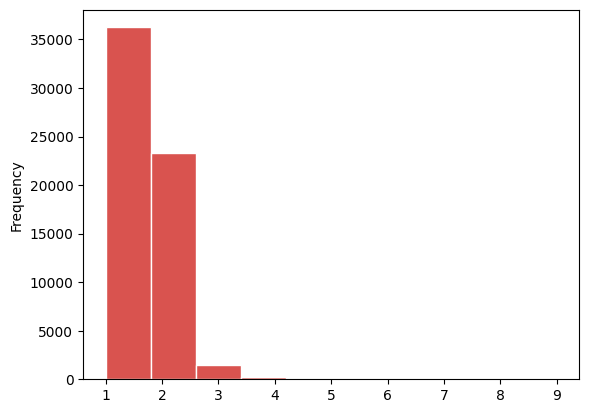

In [54]:
df[df['vehicle_reference'] < 10]['vehicle_reference'].plot(kind='hist', color='#d9534f', edgecolor='white'), df['vehicle_reference'].value_counts()

### **casualty_reference**

In [55]:
df['casualty_reference'].nunique(), df['casualty_reference'].unique()

(18,
 array([  1,   3,   2,   4,   5,   6,   7,   8,   9,  10,  11,  12,  14,
         15,  13,  16,  22, 148], dtype=int64))

(<Axes: ylabel='Frequency'>,
 casualty_reference
 1      47792
 2       9305
 3       2795
 4        934
 5        325
 6        100
 7         37
 8         15
 9         11
 10        10
 11         7
 12         6
 14         4
 13         4
 15         3
 16         2
 22         1
 148        1
 Name: count, dtype: int64)

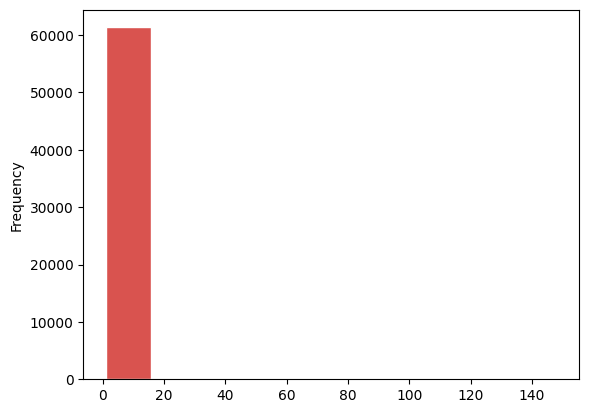

In [56]:
df['casualty_reference'].plot(kind='hist', color='#d9534f', edgecolor='white'), df['casualty_reference'].value_counts()

### **casualty_class**

In [53]:
df['casualty_class'].nunique(), df['casualty_class'].unique()

(3, array(['Driver or rider', 'Passenger', 'Pedestrian'], dtype=object))

### **sex_of_casualty**

In [57]:
df['sex_of_casualty'].nunique(), df['sex_of_casualty'].unique()

(3, array(['Female', 'Male', nan, 'unknown (self reported)'], dtype=object))

### **age_of_casualty**

In [60]:
df['age_of_casualty'].nunique(), df['age_of_casualty'].unique()

(101,
 array([ 46.,  30.,  58.,  78.,  63.,  52.,  50.,  16.,  74.,  79.,  13.,
         48.,  45.,  28.,  54.,  42.,  33.,  34.,   7.,  20.,  24.,  18.,
         80.,  14.,  32.,  19.,  59.,  36.,  84.,  23.,  43.,  55.,   5.,
         31.,  25.,  26.,  21.,  72.,  15.,  22.,  47.,  86.,  76.,  61.,
         nan,  35.,  51.,  17.,  68.,  38.,  73.,  65.,  27.,  66.,  93.,
         77.,  60.,  69.,  41.,  67.,  91.,  70.,  40.,  29.,  57.,  37.,
         53.,  81.,  12.,  44.,  39.,  10.,   8.,  62.,  56.,  64.,  49.,
          6.,  75.,  92.,   3.,  11.,  71.,  82.,   9.,   4.,   2.,   0.,
         87.,   1.,  83.,  89.,  88.,  85.,  96.,  90.,  99.,  97.,  94.,
         95.,  98., 101.]))

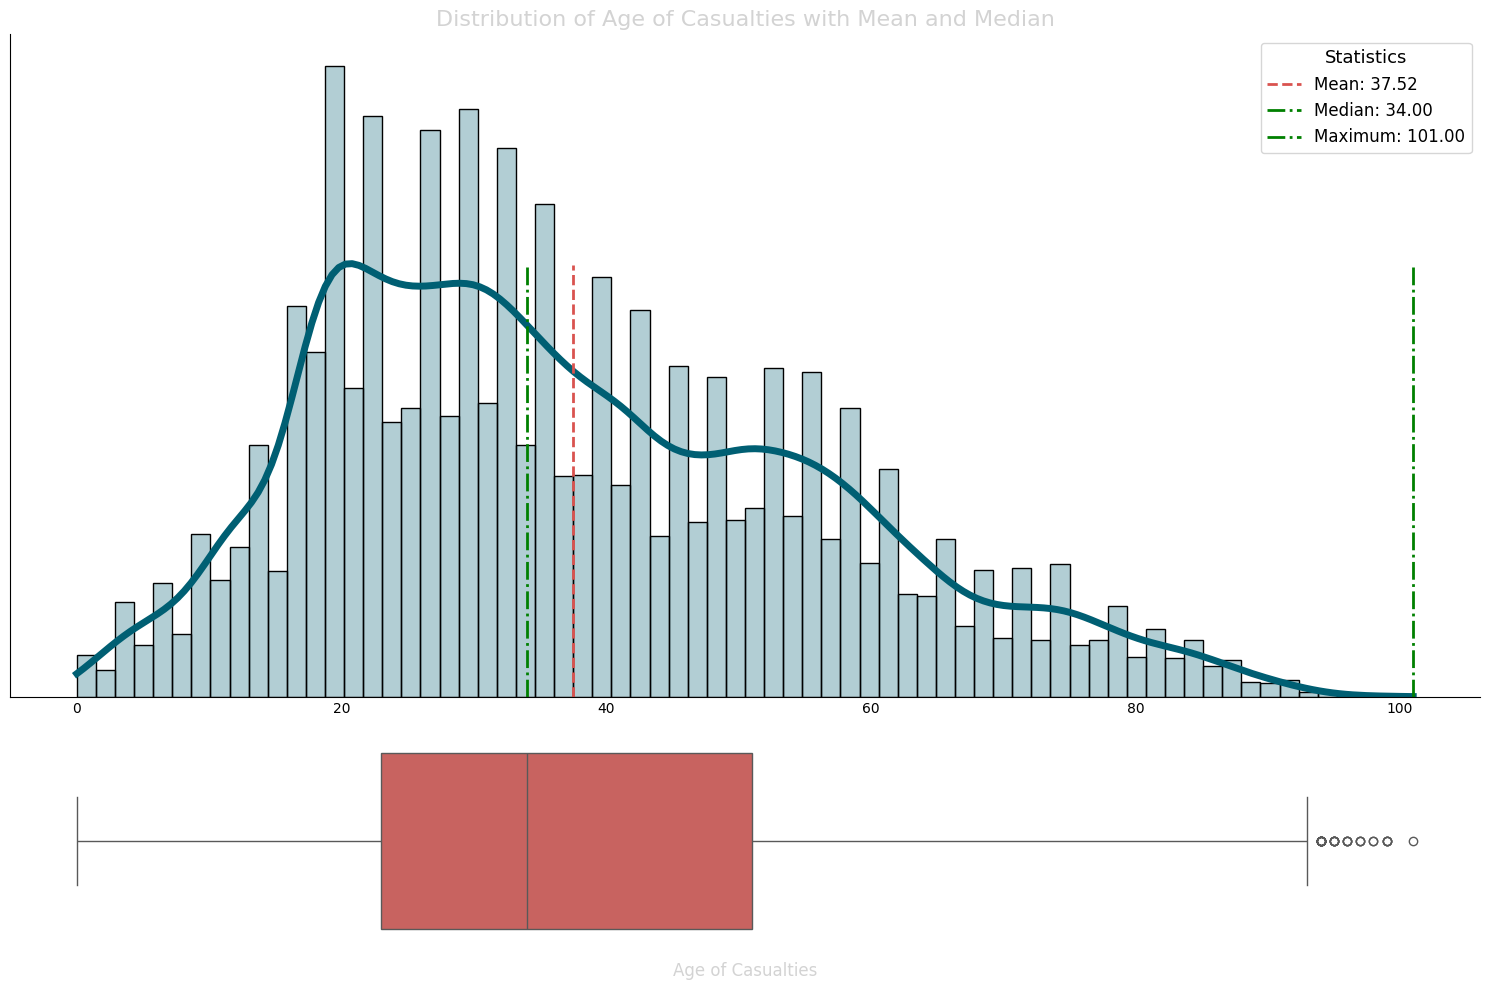

In [61]:
# Corrected plotting code
fig = plt.figure(figsize=(15, 10), facecolor='white') # Returns figure and array of axes

gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

# Axes are now in an array, so you access them using indices
ax1 = fig.add_subplot(gs[0])  # The first subplot
ax2 = fig.add_subplot(gs[1])  # The second subplot

# Plot histogram with KDE on the first axis
sns.histplot(data=df['age_of_casualty'], bins=70, color='#005f73', alpha=0.3, ax=ax1, kde=True, line_kws={'color': 'red', 'lw': 5}, legend=True)

# Mean and median lines
mean_val = df['age_of_casualty'].mean()
median_val = df['age_of_casualty'].median()
max_val = df['age_of_casualty'].max()
ax1.vlines(x=mean_val, ymin=0, ymax=2000, color='#d9534f', label=f'Mean: {mean_val:.2f}', linestyles='--', lw=2)
ax1.vlines(x=median_val, ymin=0, ymax=2000, color='green', label=f'Median: {median_val:.2f}', linestyles='-.', lw=2)
ax1.vlines(x=max_val, ymin=0, ymax=2000, color='green', label=f'Maximum: {max_val:.2f}', linestyles='-.', lw=2)

ax1.set_xlabel('')

ax1.spines[['right',  'top']].set_visible(False)
ax1.set_yticklabels([])

# Enhancements for the first plot
ax1.set_title('Distribution of Age of Casualties with Mean and Median', fontsize=16, color='lightgray')
ax2.set_xlabel('Age of Casualties', fontsize=14, color='lightgray')
ax1.set_ylabel('')

ax1.legend(title='Statistics', title_fontsize='13', fontsize='12', facecolor='white')
ax1.set_facecolor('whitesmoke')
ax1.tick_params(length=0)
ax1.set_facecolor('white')

# Plot boxplot on the second axis
sns.boxplot(x=df['age_of_casualty'], ax=ax2, color='#d9534f')

ax2.set_xlabel('Age of Casualties', fontsize=12)
ax2.spines[['right', 'left', 'top', 'bottom']].set_visible(False)
ax2.tick_params(length=0)
ax2.set_ylabel('')
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_facecolor('white')

plt.tight_layout()  # Adjust the layout
plt.show()

### **age_band_of_casualty**

In [62]:
df['age_band_of_casualty'].nunique(), df['age_band_of_casualty'].unique()

(11,
 array(['46 - 55', '26 - 35', '56 - 65', 'Over 75', '16 - 20', '66 - 75',
        '11 - 15', '36 - 45', '6 - 10', '21 - 25', '0 - 5', nan],
       dtype=object))

### **casualty_severity**

In [64]:
df['casualty_severity'].nunique(), df['casualty_severity'].unique()

(3, array(['Slight', 'Serious', 'Fatal'], dtype=object))

### **pedestrian_location**

In [65]:
df['pedestrian_location'].nunique(), df['pedestrian_location'].unique()

(11,
 array(['Not a Pedestrian', 'In carriageway, crossing elsewhere',
        'Unknown or other', 'In carriageway, not crossing',
        'On footway or verge',
        'In centre of carriageway - not on refuge, island or central reservation',
        'Crossing on pedestrian crossing facility',
        'Crossing elsewhere within 50m. of pedestrian crossing',
        'On refuge, central island or central reservation',
        'Crossing in zig-zag exit lines',
        'Crossing in zig-zag approach lines'], dtype=object))

### **pedestrian_movement**

In [66]:
df['pedestrian_movement'].nunique(), df['pedestrian_movement'].unique()

(10,
 array(['Not a Pedestrian',
        'Crossing from nearside - masked by parked or stationary vehicle',
        'Unknown or other',
        'Walking along in carriageway, back to traffic',
        "Crossing from driver's offside",
        "Crossing from driver's nearside",
        'Walking along in carriageway, facing traffic',
        'In carriageway, stationary - not crossing  (standing or playing)',
        'Crossing from offside - masked by  parked or stationary vehicle',
        'In carriageway, stationary - not crossing  (standing or playing) - masked by parked or stationary vehicle'],
       dtype=object))

### **car_passenger**

In [67]:
df['car_passenger'].nunique(), df['car_passenger'].unique()

(4,
 array(['Not car passenger', 'Rear seat passenger', 'Front seat passenger',
        nan, 'unknown (self reported)'], dtype=object))

### **bus_or_coach_passenger**

In [68]:
df['bus_or_coach_passenger'].nunique(), df['bus_or_coach_passenger'].unique()

(6,
 array(['Not a bus or coach passenger', 'Alighting', 'Seated passenger',
        'Boarding', 'Standing passenger', nan, 'unknown (self reported)'],
       dtype=object))

### **pedestrian_road_maintenance_worker**

In [70]:
df['pedestrian_road_maintenance_worker'].nunique(), df['pedestrian_road_maintenance_worker'].unique()

(3, array(['No / Not applicable', 'Not Known', 'Yes', nan], dtype=object))

### **casualty_type**

In [71]:
df['casualty_type'].nunique(), df['casualty_type'].unique()

(21,
 array(['Car occupant', 'Cyclist', 'Pedestrian',
        'Goods vehicle (over 3.5t. and under 7.5t.) occupant',
        'Motorcycle 50cc and under rider or passenger',
        'Motorcycle 125cc and under rider or passenger',
        'Agricultural vehicle occupant',
        'Motorcycle over 500cc rider or passenger',
        'Motorcycle over 125cc and up to 500cc rider or  passenger',
        'Bus or coach occupant (17 or more pass seats)',
        'Goods vehicle (unknown weight) occupant',
        'Motorcycle - unknown cc rider or passenger',
        'Other vehicle occupant', 'Taxi/Private hire car occupant',
        'Van / Goods vehicle (3.5 tonnes mgw or under) occupant',
        'Goods vehicle (7.5 tonnes mgw and over) occupant',
        'Electric motorcycle rider or passenger', 'Mobility scooter rider',
        'Minibus (8 - 16 passenger seats) occupant', 'Horse rider',
        'Tram occupant', nan], dtype=object))

### **casualty_home_area_type**

In [72]:
df['casualty_home_area_type'].nunique(), df['casualty_home_area_type'].unique()

(3, array(['Urban area', 'Small town', 'Rural', nan], dtype=object))

### **casualty_imd_decile**

In [74]:
df['casualty_imd_decile'].nunique(), df['casualty_imd_decile'].unique(), df['casualty_imd_decile'].value_counts()

(10,
 array(['Less deprived 10-20%', 'More deprived 10-20%',
        'Least deprived 10%', 'Less deprived 30-40%', nan,
        'More deprived 40-50%', 'Less deprived 20-30%',
        'More deprived 20-30%', 'More deprived 30-40%',
        'Most deprived 10%', 'Less deprived 40-50%'], dtype=object),
 casualty_imd_decile
 More deprived 10-20%    7152
 Most deprived 10%       6922
 More deprived 20-30%    6903
 More deprived 30-40%    6268
 More deprived 40-50%    5791
 Less deprived 40-50%    5331
 Less deprived 30-40%    4949
 Less deprived 20-30%    4562
 Less deprived 10-20%    4078
 Least deprived 10%      3612
 Name: count, dtype: int64)

## Cleaning Data

In [83]:
def preprocess(df):
    df = df[df['vehicle_reference'] <= 9]
    df = df[df['casualty_reference'] <= 16]
    df = df[df['sex_of_casualty'].isin([1, 2])]
    df = df[df['age_of_casualty'] > 0]
    df = df[df['age_band_of_casualty'] > 0]
    df = df[df['car_passenger'].isin([0, 1])]
    df = df[df['bus_or_coach_passenger'].isin([0, 1])]
    df = df[df['pedestrian_road_maintenance_worker'].isin([0, 1])]
    df = df[df['casualty_home_area_type'] > 0]
    df.drop(columns=['status'], inplace=True)

    return df

In [84]:
clean_df = preprocess(df)
clean_df

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,2022070151244,2022,070151244,2,1,1,2,46,8,3,0,0,0,0,0,9,1,9,E01033378
1,2022070152668,2022,070152668,1,1,1,1,30,6,3,0,0,0,0,0,9,1,2,E01018551
2,2022070154696,2022,070154696,1,1,1,2,58,9,3,0,0,0,0,0,9,1,10,E01006134
3,2022070154696,2022,070154696,2,3,1,2,78,11,3,0,0,0,0,0,9,2,10,E01018724
4,2022070154696,2022,070154696,3,2,1,1,63,9,3,0,0,0,0,0,9,3,7,W01000578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61346,2022461156575,2022,461156575,1,1,1,1,69,10,2,0,0,0,0,0,4,1,7,E01024707
61347,2022461156711,2022,461156711,1,1,3,2,56,9,3,10,9,0,0,0,0,1,10,E01024046
61349,2022461157256,2022,461157256,2,1,1,1,42,7,3,0,0,0,0,0,9,1,5,E01016034
61350,2022461157316,2022,461157316,1,1,1,2,40,7,3,0,0,0,0,0,9,1,3,E01024497


## Checking Correlation of The Columns

In [85]:
clean_df.drop(columns=['accident_index', 'accident_reference', 'accident_year', 'lsoa_of_casualty']).corr()

,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
vehicle_reference,1.000000,0.261473,-0.262845,0.028535,0.065015,0.082120,0.072481,-0.258901,-0.228456,0.049612,-0.015494,-0.035293,0.068537,0.020581,0.036490
casualty_reference,0.261473,1.000000,0.081717,0.073450,0.006161,0.001174,0.036665,-0.095849,-0.076514,0.379391,0.001816,-0.002045,0.046049,0.061337,0.023646
casualty_class,-0.262845,0.081717,1.000000,0.150356,-0.086308,-0.140598,-0.078244,0.790010,0.696413,0.277674,0.018809,0.104595,-0.189705,-0.063383,-0.070858
sex_of_casualty,0.028535,0.073450,0.150356,1.000000,0.051557,0.048496,0.068989,0.059403,0.056753,0.173099,0.007763,-0.012222,-0.067421,0.044479,0.056961
age_of_casualty,0.065015,0.006161,-0.086308,0.051557,1.000000,0.976223,-0.075504,-0.047128,-0.031268,-0.024502,0.024602,-0.007221,-0.006310,0.099143,0.149900
age_band_of_casualty,0.082120,0.001174,-0.140598,0.048496,0.976223,1.000000,-0.062267,-0.086936,-0.061143,-0.036868,0.022780,-0.008742,0.003117,0.089102,0.138561
casualty_severity,0.072481,0.036665,-0.078244,0.068989,-0.075504,-0.062267,1.000000,-0.083335,-0.064424,0.037501,0.004658,-0.004478,-0.035739,-0.039095,-0.026044
pedestrian_location,-0.258901,-0.095849,0.790010,0.059403,-0.047128,-0.086936,-0.083335,1.000000,0.824180,-0.118568,-0.007658,0.144347,-0.194847,-0.055751,-0.055861
pedestrian_movement,-0.228456,-0.076514,0.696413,0.056753,-0.031268,-0.061143,-0.064424,0.824180,1.000000,-0.104525,-0.006751,0.117940,-0.171765,-0.049420,-0.045481
car_passenger,0.049612,0.379391,0.277674,0.173099,-0.024502,-0.036868,0.037501,-0.118568,-0.104525,1.000000,-0.007428,-0.015698,-0.012169,0.033305,0.001931


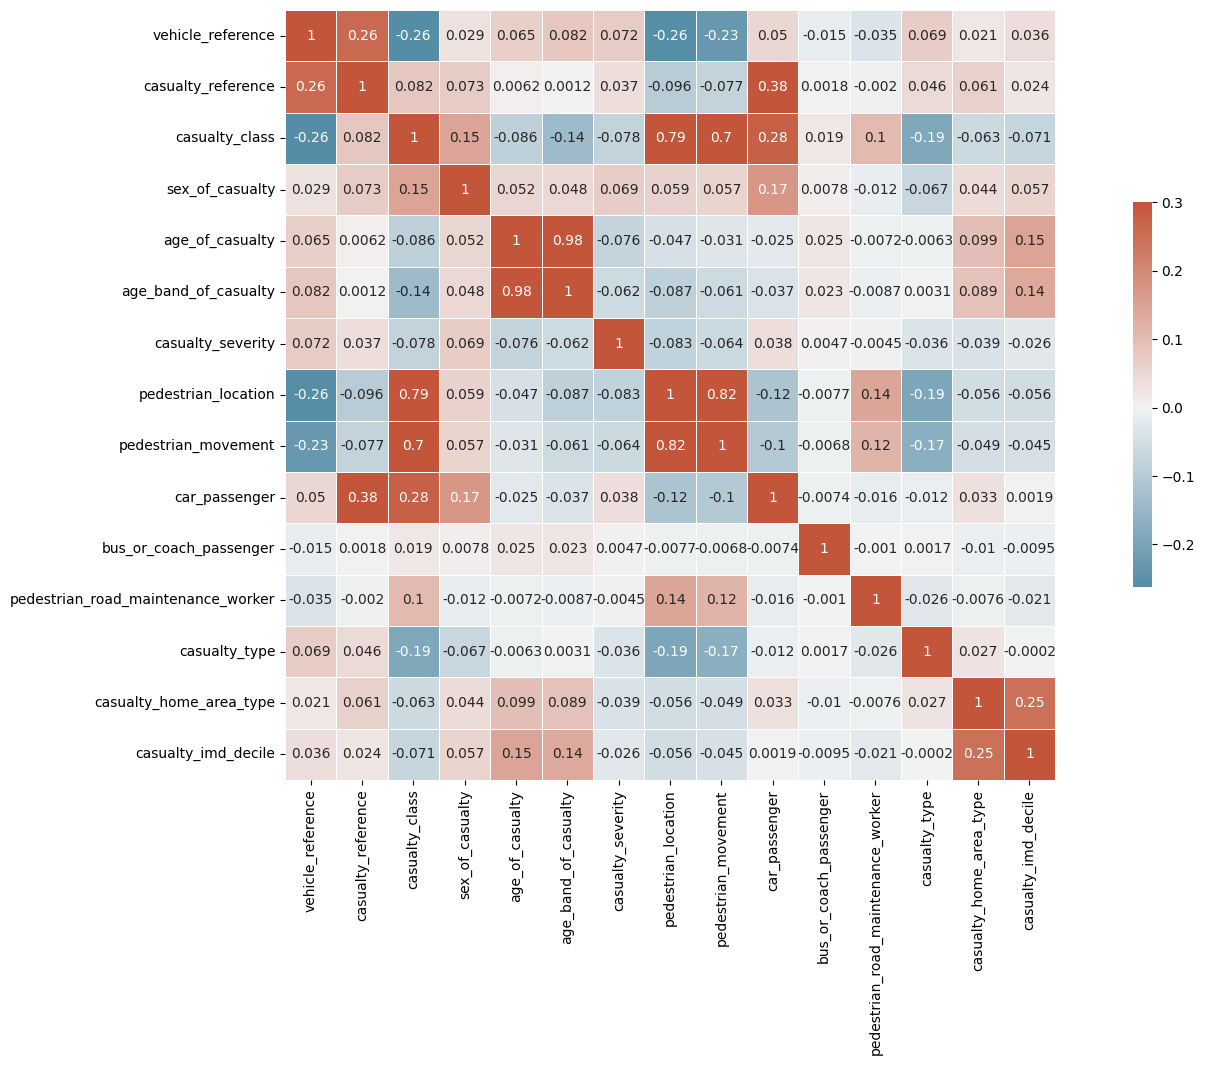

In [86]:
fig, ax = plt.subplots(figsize=(20,10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(clean_df.drop(columns=['accident_index', 'accident_reference', 'accident_year', 'lsoa_of_casualty']).corr(), annot=True, cbar_kws={"shrink": .5}, center=0,
            square=True, linewidths=.5, vmax=.3, cmap=cmap)
plt.show()

* **High Positive Correlations**:

    * ***Pedestrian Location & Pedestrian Movement***:  The correlation of 0.824177 indicates a very strong positive relationship. This suggests that the specifics of a pedestrian's location are highly related to their movement patterns in the context of accidents.

    * ***Age of Casualty & Age Band of Casualty***: We see a very high correlation (0.976226), indicating that these two variables are closely related, as expected since age bands are categorizations based on the exact age of the casualty.

* **Significant Relationships and Trends**:

    * ***Casualty Class with Pedestrian Location and Movement***: The correlations of 0.790059 and 0.696455 respectively show strong positive relationships, indicating that the classification of the casualty (e.g., driver, passenger, pedestrian) is significantly associated with where and how pedestrians are moving at the time of accidents.
    
    * ***Car Passenger & Casualty Reference***: A correlation of 0.382474 suggests a strong positive relationship, indicating that being a car passenger is significantly associated with the casualty reference, likely reflecting the recording practices or the nature of incidents involving passengers.

* **Negative Correlations:**:

    * ***Casualty Class with Vehicle Reference:***: A correlation of -0.264725 indicates a moderate negative relationship, suggesting that certain classifications of casualties are less likely to be associated with specific vehicle references, perhaps reflecting different dynamics in accidents involving pedestrians versus those inside vehicles.

* **Demographics and Socioeconomic Factors**:
    * ***Age of Casualty & Age Band of Casualty with Casualty IMD Decile***: These relationships, with correlations of 0.149943 and 0.138586 respectively with the IMD decile, suggest that the age of the casualty and their age group have a moderate positive association with socioeconomic status, as indicated by the IMD decile.

    * ***Age of Casualty & Age Band of Casualty with Casualty IMD Decile***:  With a correlation of 0.245606, this indicates a moderate positive relationship, suggesting that the area type where the casualty comes from is somewhat associated with socioeconomic status.

* **Casualty Severity**:

    * The correlations involving casualty severity are not particularly high, indicating that the severity of casualties does not have strong linear relationships with most of the other factors. This suggests that casualty severity is influenced by a complex interplay of factors beyond simple linear associations.

* **Specific Observations**:
    * ***Pedestrian Road Maintenance Worker***: The correlations related to this variable are generally low, indicating that occurrences involving pedestrian road maintenance workers do not have strong linear relationships with most other factors considered in this matrix.
    * ***Casualty Type***: The correlations with this variable are also relatively low, suggesting that the specific type of casualty does not strongly correlate with the other variables in a linear manner.

This matrix underscores the complexity of factors involved in vehicle accidents and their impact on casualties. It highlights strong associations between pedestrian dynamics and casualty classifications, the significant role of demographic and socioeconomic factors, and the nuanced relationships between different aspects of accidents and casualties.

# Data Analysis

In [87]:
clean_df.head()

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,2022070151244,2022,070151244,2,1,1,2,46,8,3,0,0,0,0,0,9,1,9,E01033378
1,2022070152668,2022,070152668,1,1,1,1,30,6,3,0,0,0,0,0,9,1,2,E01018551
2,2022070154696,2022,070154696,1,1,1,2,58,9,3,0,0,0,0,0,9,1,10,E01006134
3,2022070154696,2022,070154696,2,3,1,2,78,11,3,0,0,0,0,0,9,2,10,E01018724
4,2022070154696,2022,070154696,3,2,1,1,63,9,3,0,0,0,0,0,9,3,7,W01000578


## Casualty Class & Pedestrian Movement

In [88]:
clean_df.groupby('casualty_class')[['pedestrian_movement', 'pedestrian_location']].count()

,pedestrian_movement,pedestrian_location
casualty_class,,
1,37487,37487
2,5745,5745
3,6813,6813


In [89]:
clean_df.groupby(['pedestrian_movement', 'pedestrian_location'])['casualty_class'].count()

pedestrian_movement  pedestrian_location
0                    0                      43231
1                    0                          1
                     1                        586
                     2                         17
                     3                         14
                                            ...  
9                    6                        727
                     7                         13
                     8                         39
                     9                        232
                     10                       431
Name: casualty_class, Length: 71, dtype: int64

<Axes: xlabel='pedestrian_movement,pedestrian_location'>

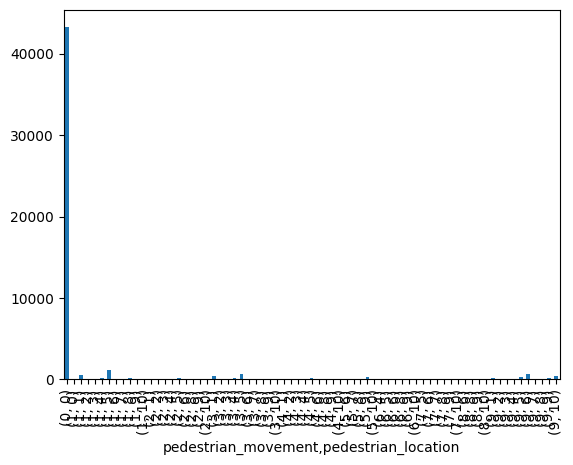

In [90]:
clean_df.groupby(['pedestrian_movement', 'pedestrian_location'])['casualty_class'].count().plot(kind='bar')
